## 1. Import necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore') 

import statsmodels.formula.api as smf 

In [2]:
df = pd.read_csv(r'C:\Users\sawaled\Desktop\Personal\data\Assignment_4_Simple linear regression\delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.rename(columns={'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace= True)

In [4]:
columns1= ['Sorting_Time','Delivery_Time']
df = df.reindex(columns=columns1)
df.head()

,Sorting_Time,Delivery_Time
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


## 4. Data understanding

In [5]:
df.shape

(21, 2)

In [6]:
df.dtypes

Sorting_Time       int64
Delivery_Time    float64
dtype: object

In [7]:
df.isna().sum()

Sorting_Time     0
Delivery_Time    0
dtype: int64

In [23]:
df.describe()

,Sorting_Time,Delivery_Time
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


## 5. Data preparation,Model building and Evaluation with Scaled values

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(data=df1, columns= ['Sorting_Time','Delivery_Time'])
df1.head()

,Sorting_Time,Delivery_Time
0,1.000,0.619048
1,0.250,0.261905
2,0.500,0.559524
3,0.875,0.761905
4,1.000,1.000000


## 5.1 Linear regression assumption check

### 5.1.1 Linearity check

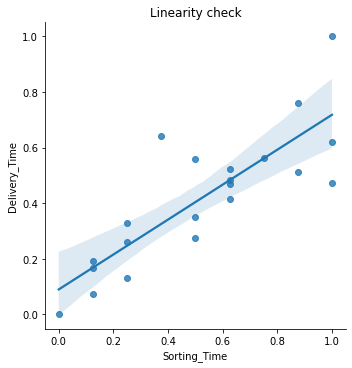

In [25]:
sns.lmplot( x= 'Sorting_Time', y= 'Delivery_Time', data = df1)
plt.title('Linearity check')
plt.show()

### 5.1.2 Normality check

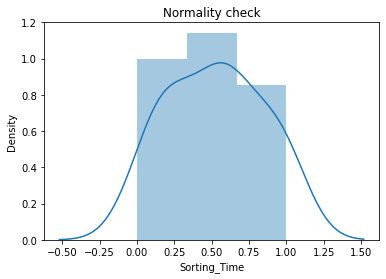

In [26]:
sns.distplot(a= df1['Sorting_Time'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

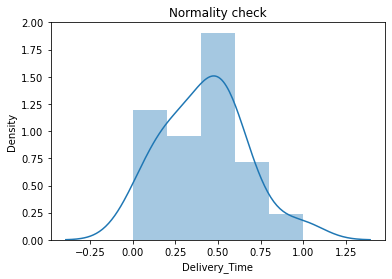

In [27]:
sns.distplot(a= df1['Delivery_Time'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

In [28]:
df1['Sorting_Time'].skew() # skew is in range 0-0.5 #Moderately symmetriceal about mean

0.047115474210530174

## 5.2 Model building

In [29]:
linear_model = smf.ols('Delivery_Time ~ Sorting_Time', data = df1).fit()

In [30]:
linear_model.params

Intercept       0.089561
Sorting_Time    0.628198
dtype: float64

In [31]:
linear_model.summary() #Adjusted R value more than 90%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        16:11:22   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0896      0.060      1.496      0.151      -0.036       0.215
Sorting_Time     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.3 Model Evaluation

In [32]:
X = df1['Sorting_Time']

In [33]:
y_pred = linear_model.predict(X).round()
y_pred.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
dtype: float64

In [34]:
mean_squared_error = np.mean((df1['Delivery_Time']-y_pred)**2)
mean_squared_error

0.1425148580066947

## 5.4 Check for Homoscedasticity and Zero residual mean

### 5.4.1 Residual plot

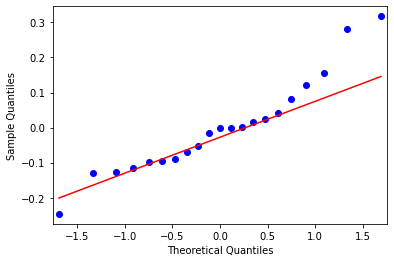

In [35]:
import statsmodels.api as sm
sm.qqplot(linear_model.resid, line='q')
plt.show()

### 5.4.2 . Check for Homoscedasticity

plot of standardized fitted value vc standardised residual values

In [36]:
def std_value(i):
    return (i-i.mean())/i.std()

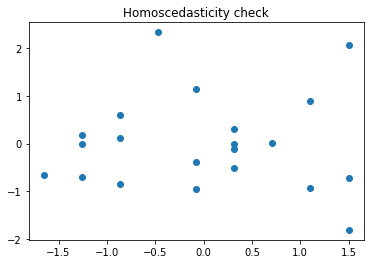

In [37]:
plt.scatter( x= std_value(linear_model.fittedvalues), y= std_value(linear_model.resid))
plt.title('Homoscedasticity check')
plt.show()

### ========================================================================================= 

### =========================================================================================

## 6. Data preparation,Model building and Evaluation with Scaled values

In [53]:
df2 = df.copy()
df2['Delivery_Time'] = np.sqrt(df2['Delivery_Time'])
df2.head()

,Sorting_Time,Delivery_Time
0,10,4.582576
1,4,3.674235
2,6,4.444097
3,9,4.898979
4,10,5.385165


## 6.1 Linear regression assumption check

### 6.1.1 Linearity check

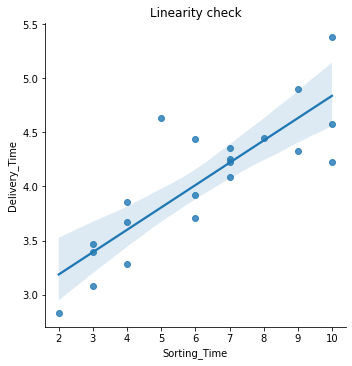

In [54]:
sns.lmplot( x= 'Sorting_Time', y= 'Delivery_Time', data = df2)
plt.title('Linearity check')
plt.show()

### 6.1.2 Normality check

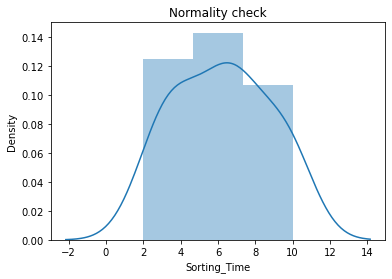

In [55]:
sns.distplot(a= df2['Sorting_Time'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

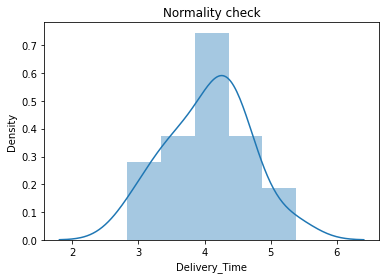

In [56]:
sns.distplot(a= df2['Delivery_Time'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

In [57]:
df2['Sorting_Time'].skew() # skew is in range 0-0.5 #Moderately symmetriceal about mean

0.047115474210530174

## 6.2 Model building

In [58]:
linear_model1 = smf.ols('Delivery_Time ~ Sorting_Time', data = df2).fit()

In [59]:
linear_model1.params

Intercept       2.772731
Sorting_Time    0.206632
dtype: float64

In [60]:
linear_model1.summary() #Adjusted R value more than 90%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.00e-06
Time:                        16:41:40   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.3 Model Evaluation

In [61]:
X1 = df2['Sorting_Time']

In [62]:
y_pred1 = linear_model1.predict(X1).round()
y_pred1.head()

0    5.0
1    4.0
2    4.0
3    5.0
4    5.0
dtype: float64

In [65]:
mean_squared_error = np.mean((df2['Delivery_Time']-y_pred1)**2)
mean_squared_error

0.17043707632117955

## 6.4 Check for Homoscedasticity and Zero residual mean

### 6.4.1 Residual plot

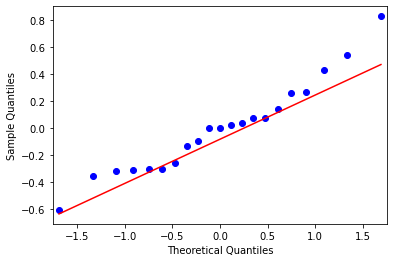

In [66]:
import statsmodels.api as sm
sm.qqplot(linear_model1.resid, line='q')
plt.show()

### 6.4.2 . Check for Homoscedasticity

plot of standardized fitted value vc standardised residual values

In [67]:
def std_value(i):
    return (i-i.mean())/i.std()

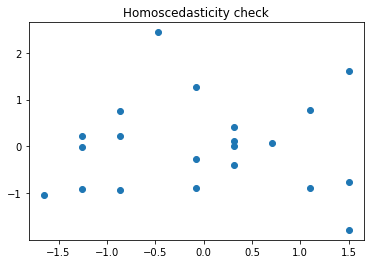

In [68]:
plt.scatter( x= std_value(linear_model1.fittedvalues), y= std_value(linear_model1.resid))
plt.title('Homoscedasticity check')
plt.show()

### =========================================================================================